#**1. Monte Carlo estimation of Shapley value**

Consider n agents (A, B, C . . . N) boarding a (sufficiently large) taxi at location 0 on the real
line. They share the taxi to return home. Agent A lives at distance 1, B at distance 2, etc. In
general, for agent ai the distance to home equals i. The taxi driver agrees that they only need to
pay the fare to the most remote destination (which is at location n).


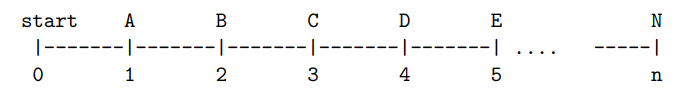

In [ ]:
from itertools import combinations
import random

**Q1. Compute (using the theory) the Shapley values for this problem when n is small, e.g. n = 4 or 5. This will allow you to generalise to arbitrary values of n.**

In [ ]:
def shapley_value(n, i):
  total_value = 0
  for S in combinations(range(1, n+1), i):
    total_value += marginal_contribution(S, i) * probability(S, n)
  return total_value

def marginal_contribution(S, i):
  return i if i in S else 0

def probability(S, n):
  return 1 / 2**n

In [ ]:
# when  n is 4
n = 4
for i in range(1, n+1):
  print(f"Shapley value for agent {i}: {shapley_value(n, i)}")

Shapley value for agent 1: 0.0625
Shapley value for agent 2: 0.375
Shapley value for agent 3: 0.5625
Shapley value for agent 4: 0.25


In [ ]:
# when  n is 5
n = 5
for i in range(1, n+1):
  print(f"Shapley value for agent {i}: {shapley_value(n, i)}")

Shapley value for agent 1: 0.03125
Shapley value for agent 2: 0.25
Shapley value for agent 3: 0.5625
Shapley value for agent 4: 0.5
Shapley value for agent 5: 0.15625


**Q2.  Now set n to a large value, e.g n = 50 or n = 100. From the above you are able to guess
what the Shapley values will be. However, use Monte Carlo sampling to find an approximate
value for the Shapley values in this case. Discuss how effective Monte Carlo sampling is for
this problem.**

In [ ]:
def approximate_shapley_values(n, num_samples):
  # Initialize a dictionary to store the sum of marginal contributions for each agent
  total_contributions = {i: 0 for i in range(1, n+1)}

  # Generate num_samples random subsets of the agents
  for _ in range(num_samples):
    S = random.sample(range(1, n+1), random.randint(1, n))
    for i in range(1, n+1):
      total_contributions[i] += marginal_contribution(S, i)

  # Compute the approximate Shapley values by averaging the marginal contributions
  approximate_shapley_values = {i: total_contributions[i] / num_samples for i in range(1, n+1)}

  return approximate_shapley_values

def marginal_contribution(S, i):
  return i if i in S else 0

In [ ]:
n = 50
approximate_shapley_values = approximate_shapley_values(n, 1000)
for i in range(1, n+1):
  print(f"Approximate Shapley value for agent {i}: {approximate_shapley_values[i]}")

Approximate Shapley value for agent 1: 0.521
Approximate Shapley value for agent 2: 0.954
Approximate Shapley value for agent 3: 1.482
Approximate Shapley value for agent 4: 2.148
Approximate Shapley value for agent 5: 2.56
Approximate Shapley value for agent 6: 2.952
Approximate Shapley value for agent 7: 3.521
Approximate Shapley value for agent 8: 4.176
Approximate Shapley value for agent 9: 4.554
Approximate Shapley value for agent 10: 5.05
Approximate Shapley value for agent 11: 5.797
Approximate Shapley value for agent 12: 6.108
Approximate Shapley value for agent 13: 6.708
Approximate Shapley value for agent 14: 7.378
Approximate Shapley value for agent 15: 7.845
Approximate Shapley value for agent 16: 8.096
Approximate Shapley value for agent 17: 8.806
Approximate Shapley value for agent 18: 9.198
Approximate Shapley value for agent 19: 9.69
Approximate Shapley value for agent 20: 10.74
Approximate Shapley value for agent 21: 10.773
Approximate Shapley value for agent 22: 11.0


In [ ]:
n = 100
approximate_shapley_values = approximate_shapley_values(n, 1000)
for i in range(1, n+1):
  print(f"Approximate Shapley value for agent {i}: {approximate_shapley_values[i]}")

Approximate Shapley value for agent 1: 0.543
Approximate Shapley value for agent 2: 1.01
Approximate Shapley value for agent 3: 1.596
Approximate Shapley value for agent 4: 2.056
Approximate Shapley value for agent 5: 2.54
Approximate Shapley value for agent 6: 3.222
Approximate Shapley value for agent 7: 3.633
Approximate Shapley value for agent 8: 4.088
Approximate Shapley value for agent 9: 4.698
Approximate Shapley value for agent 10: 5.14
Approximate Shapley value for agent 11: 5.654
Approximate Shapley value for agent 12: 6.396
Approximate Shapley value for agent 13: 6.591
Approximate Shapley value for agent 14: 7.154
Approximate Shapley value for agent 15: 7.845
Approximate Shapley value for agent 16: 8.192
Approximate Shapley value for agent 17: 8.925
Approximate Shapley value for agent 18: 9.234
Approximate Shapley value for agent 19: 9.804
Approximate Shapley value for agent 20: 9.98
Approximate Shapley value for agent 21: 11.235
Approximate Shapley value for agent 22: 12.122